# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/dsvitorchaves/EBAC/main/previsao_de_renda.csv'

dados = pd.read_csv(url)
dados.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [17]:
# Verifica se 'Unnamed: 0' está presente e remove a coluna
if 'Unnamed: 0' in dados.columns:
    dados = dados.drop('Unnamed: 0', axis=1)

dados.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


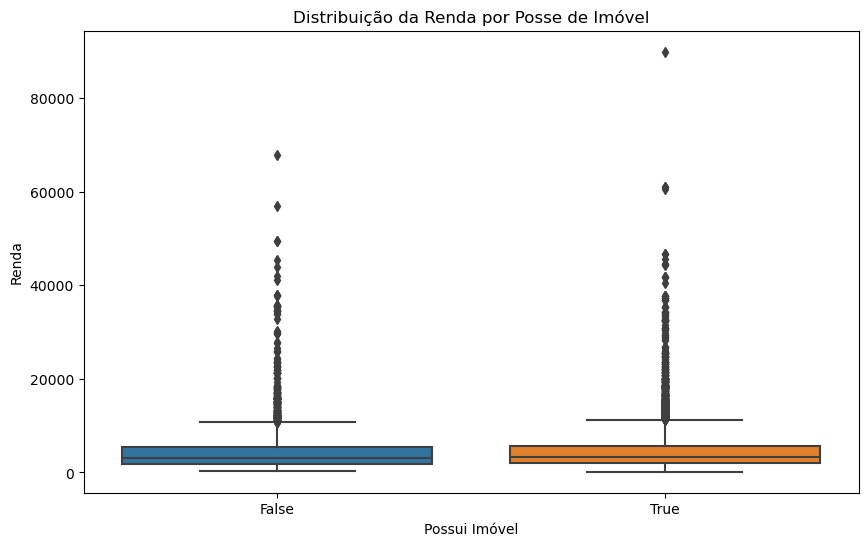

In [18]:
# Gráfico de boxplot para a renda por posse de imóvel
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados, x='posse_de_imovel', y='renda')
plt.title('Distribuição da Renda por Posse de Imóvel')
plt.xlabel('Possui Imóvel')
plt.ylabel('Renda')
plt.show()

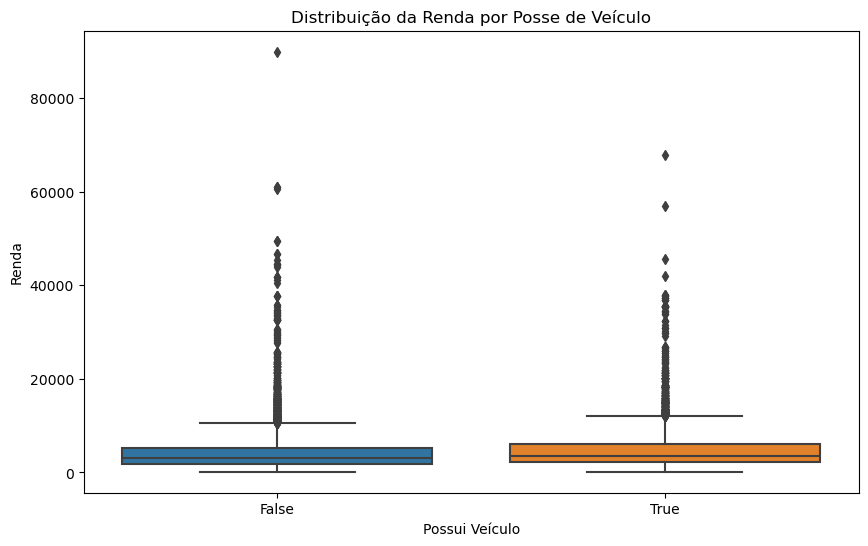

In [19]:
# Gráfico de boxplot para a renda por posse de veículo
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados, x='posse_de_veiculo', y='renda')
plt.title('Distribuição da Renda por Posse de Veículo')
plt.xlabel('Possui Veículo')
plt.ylabel('Renda')
plt.show()

In [20]:
# Média de renda por posse de imóvel
media_renda_imovel = dados.groupby('posse_de_imovel')['renda'].mean()
print(media_renda_imovel)

posse_de_imovel
False    4426.970482
True     4721.052704
Name: renda, dtype: float64


In [22]:
# Média de renda por posse de veículo
media_renda_veiculo = dados.groupby('posse_de_veiculo')['renda'].mean()
print(media_renda_veiculo)

posse_de_veiculo
False    4390.506963
True     4992.579609
Name: renda, dtype: float64


C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True

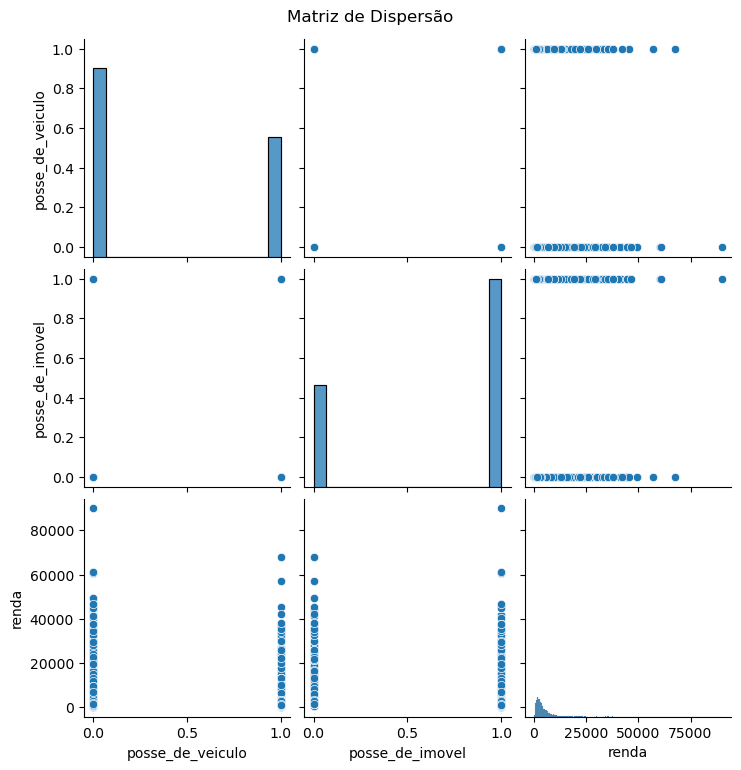

In [24]:
# Selecionar as variáveis quantitativas
variaveis_qualitativas = dados[['posse_de_veiculo', 'posse_de_imovel', 'renda']]

# Criar a matriz de dispersão
sns.pairplot(variaveis_qualitativas)
plt.suptitle('Matriz de Dispersão', y=1.02)
plt.show()

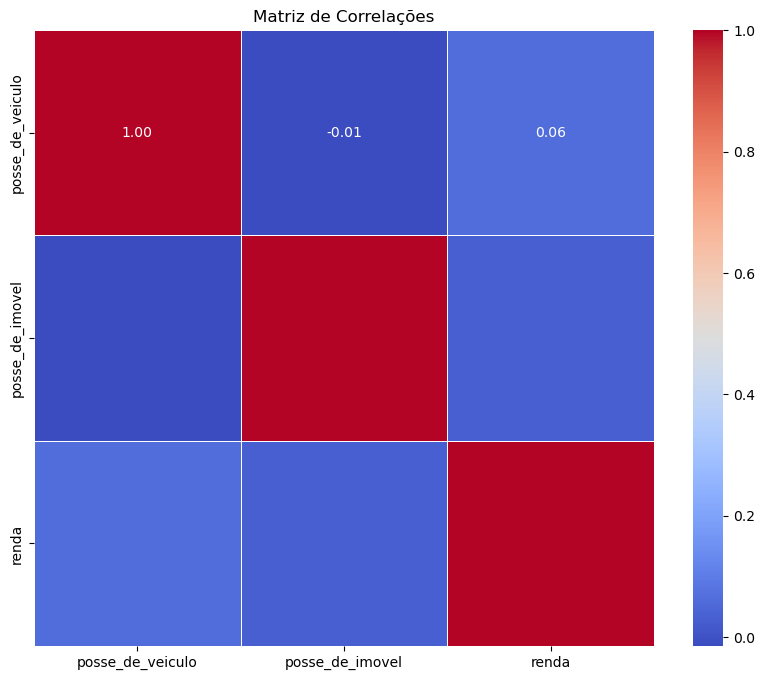

In [25]:
# Calcular a matriz de correlações
correlacoes = variaveis_qualitativas.corr()

# Criar o mapa de calor da matriz de correlações
plt.figure(figsize=(10, 8))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlações')
plt.show()

- Após a análise das variáveis qualitativas posse_de_imovel e posse_de_veiculo, foi observado que essas variáveis não são boas preditoras para a variável renda.

- Os gráficos de distribuição e as estatísticas associadas revelaram que, ao invés de haver uma relação clara ou consistente entre essas variáveis e a renda, as categorias dentro de posse_de_imovel e posse_de_veiculo mostraram-se bem distintas e não seguem um padrão que pudesse sugerir uma correlação significativa com a renda.

- Esses resultados indicam que a posse de imóvel ou de veículo, por si só, não é um indicador confiável para prever os níveis de renda dos indivíduos. Isso pode refletir que outros fatores, além da posse de bens, têm uma influência maior e mais direta sobre a renda.